In [19]:
!pip install kaggle

In [40]:
#Import dependencies
import pandas as pd
import os
import kagglehub
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

Download CVE & CWE Dataset (1999 – 2025) from Kaggle
Link: https://www.kaggle.com/datasets/stanislavvinokur/cve-and-cwe-dataset-1999-2025

In [21]:
# Download latest version
cve_path = kagglehub.dataset_download("stanislavvinokur/cve-and-cwe-dataset-1999-2025")

print("Path to dataset files:", cve_path)
cve = os.listdir(cve_path)[0]

Using Colab cache for faster access to the 'cve-and-cwe-dataset-1999-2025' dataset.
Path to dataset files: /kaggle/input/cve-and-cwe-dataset-1999-2025


In [22]:
#df = pd.read_csv(f"{path}/CVE_CWE_2025.csv")
cve_df = pd.read_csv(f"{cve_path}/{cve}")
cve_df.head()

,ID,CVE-ID,CVSS-V4,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID
0,1,CVE-1999-0001,NaN,NaN,5.0,MEDIUM,ip_input.c in BSD-derived TCP/IP implementatio...,CWE-20
1,2,CVE-1999-0002,NaN,NaN,10.0,HIGH,Buffer overflow in NFS mountd gives root acces...,CWE-119
2,3,CVE-1999-0003,NaN,NaN,10.0,HIGH,Execute commands as root via buffer overflow i...,NVD-CWE-Other
3,4,CVE-1999-0004,NaN,NaN,5.0,MEDIUM,"MIME buffer overflow in email clients, e.g. So...",NVD-CWE-Other
4,5,CVE-1999-0005,NaN,NaN,10.0,HIGH,Arbitrary command execution via IMAP buffer ov...,NVD-CWE-Other


Download CISA Known Vulnerabilities and Exploits Catalogue from Kaggle Link:https://www.kaggle.com/datasets/thedevastator/cisa-known-vulnerabilities-and-exploits-catalogu

In [23]:
# Download latest version
cisa_vuln_path = kagglehub.dataset_download("thedevastator/cisa-known-vulnerabilities-and-exploits-catalogu")

print("Path to dataset files:", cisa_vuln_path)
cisa_vuln = os.listdir(cisa_vuln_path)[0]


Using Colab cache for faster access to the 'cisa-known-vulnerabilities-and-exploits-catalogu' dataset.
Path to dataset files: /kaggle/input/cisa-known-vulnerabilities-and-exploits-catalogu


In [24]:
cisa_vuln_df = pd.read_csv(f"{cisa_vuln_path}/{cisa_vuln}")
cisa_vuln_df.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


Load data into SQLite.
Read CSV files and "sink" them into an SQLite database file named security_risk.db.

In [29]:
#from sqlalchemy import create_engine

# 1. Connect to (or create) the SQLite database
# The file 'security_risk.db' will be created in your current folder
engine = create_engine('sqlite:///security_risk.db')

def load_security_data():
    print("Starting data load...")

    # 2. Load CISA KEV Data
    # Note: Ensure the file name matches exactly what you downloaded
    #cisa_vuln_df = pd.read_csv('cisa_kev.csv')
    cisa_vuln_df = pd.read_csv(f"{cisa_vuln_path}/{cisa_vuln}")
    # 3. Load CVE/CWE Data
    # Use encoding='latin-1' if you get a 'utf-8' error on large Kaggle sets
    #cve_df = pd.read_csv('cve_cwe_dataset.csv', low_memory=False)
    cve_df = pd.read_csv(f"{cve_path}/{cve}", low_memory=False)

    # 4. Basic Cleaning: Standardize Column Names
    # Removing spaces and making lowercase makes writing SQL much easier later
    cisa_vuln_df.columns = [c.lower().replace(' ', '_') for c in cisa_vuln_df.columns]
    cve_df.columns = [c.lower().replace(' ', '_') for c in cve_df.columns]

    # 5. Push to SQLite
    # if_exists='replace' ensures that if you run this twice, it overwrites the old data
    cisa_vuln_df.to_sql('cisa_kev', engine, if_exists='replace', index=False)
    cve_df.to_sql('cve_master', engine, if_exists='replace', index=False)

    print("Success! Data loaded into 'cisa_kev' and 'cve_master' tables.")

if __name__ == "__main__":
    load_security_data()

Starting data load...
Success! Data loaded into 'cisa_kev' and 'cve_master' tables.


In [37]:
# Check the first 5 rows of the joined data
query = """
SELECT
    c."cve-id",
    c."CVSS-V3",
    k.vulnerability_name
FROM cve_master c
JOIN cisa_kev k ON c."cve-id" = k.cve_id
LIMIT 5;
"""
df_test = pd.read_sql(query, engine)
print(df_test)

          cve-id  cvss-v3                                 vulnerability_name
0  CVE-2002-0367      7.8  Microsoft Windows Privilege Escalation Vulnera...
1  CVE-2004-0210      7.8  Microsoft Windows Privilege Escalation Vulnera...
2  CVE-2005-2773      9.8  HP OpenView Network Node Manager Remote Code E...
3  CVE-2006-1547      7.5  Apache Struts 1 ActionForm Denial-of-Service V...
4  CVE-2006-2492      8.8  Microsoft Word Malformed Object Pointer Vulner...


**Visualize the Results**

Present data clearly to leadership. Turn the table into a professional bar chart using seaborn.

In [43]:
cwe_query = """
SELECT
    c."cwe-id",
    COUNT(k.cve_id) as exploit_count
FROM cve_master c
JOIN cisa_kev k ON c."cve-id" = k.cve_id
WHERE c."cwe-id" IS NOT NULL AND c."cwe-id" != ''
GROUP BY c."cwe-id"
ORDER BY exploit_count DESC
LIMIT 10;
"""

# Execute and store the distribution
cwe_distribution = pd.read_sql(cwe_query, engine)

print("TOP 10 ROOT CAUSES (CWEs) FROM CISA KEV:")
print(cwe_distribution)

TOP 10 ROOT CAUSES (CWEs) FROM CISA KEV:
          cwe-id  exploit_count
0  NVD-CWE-Other            155
1        CWE-787             86
2        CWE-416             51
3         CWE-78             44
4         CWE-20             40
5         CWE-22             39
6        CWE-119             32
7         CWE-94             29
8        CWE-843             21
9        CWE-502             18


/tmp/ipython-input-3118150302.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


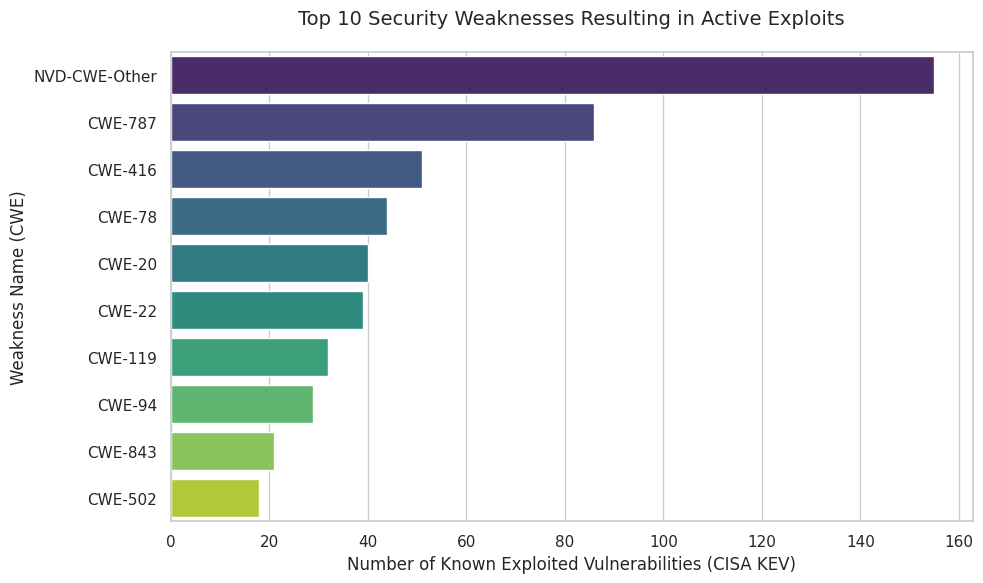

In [45]:
# Set the visual style
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create the bar chart
ax = sns.barplot(
    data=cwe_distribution,
    x='exploit_count',
    y='cwe-id',
    palette='viridis'
)

# Add titles and labels
plt.title('Top 10 Security Weaknesses Resulting in Active Exploits', fontsize=14, pad=20)
plt.xlabel('Number of Known Exploited Vulnerabilities (CISA KEV)', fontsize=12)
plt.ylabel('Weakness Name (CWE)', fontsize=12)

# Tight layout to prevent cropping
plt.tight_layout()

# Save for your GitHub
plt.savefig('top_exploited_cwes.png')
plt.show()

Create a detailed breakdown of the top 10 CWE's to provide management with a better insight into what each cwe is.

In [50]:
# Detailed query to get IDs, Counts, and Samples
# Querying the IDs, names from CISA, and descriptions from CVE Master
detailed_cwe_query = """
SELECT
    c."cwe-id",
    COUNT(k.cve_id) as exploit_count,
    -- Get the most common vulnerability name as a sample
    MAX(k.vulnerability_name) as sample_vulnerability,
    -- Get the actual technical description of the weakness
    MAX(c.description) as weakness_description
FROM cve_master c
JOIN cisa_kev k ON c."cve-id" = k.cve_id
WHERE c."cwe-id" IS NOT NULL AND c."cwe-id" != ''
GROUP BY c."cwe-id"
ORDER BY exploit_count DESC
LIMIT 10;
"""

df_final = pd.read_sql(detailed_cwe_query, engine)

# Print the "Security Intelligence Report"
print("=== TOP 10 SECURITY WEAKNESSES (CWE) ANALYSIS ===\n")

for index, row in df_final.iterrows():
    print(f"RANK {index+1}: {row['cwe-id']}")
    print(f"Exploit Frequency: {row['exploit_count']} Active Exploits")
    print(f"Sample Vulnerability: {row['sample_vulnerability']}")

    # Truncate the description to keep it readable
    desc = row['weakness_description']
    print(f"Root Cause Detail: {desc[:200]}..." if len(desc) > 200 else f"Root Cause Detail: {desc}")
    print("-" * 60)

=== TOP 10 SECURITY WEAKNESSES (CWE) ANALYSIS ===

RANK 1: NVD-CWE-Other
Exploit Frequency: 155 Active Exploits
Sample Vulnerability: Zoho Desktop Central Authentication Bypass Vulnerability
Root Cause Detail: win32k.sys in the kernel-mode drivers in Microsoft Windows Server 2003 SP2, Windows Vista SP2, Windows Server 2008 SP2 and R2 SP1, Windows 7 SP1, Windows 8, Windows 8.1, Windows Server 2012 Gold and R...
------------------------------------------------------------
RANK 2: CWE-787
Exploit Frequency: 86 Active Exploits
Sample Vulnerability: VMware ESXi/Horizon DaaS Appliances Heap-Overwrite Vulnerability
Root Cause Detail: Windows Win32k Elevation of Privilege Vulnerability
------------------------------------------------------------
RANK 3: CWE-416
Exploit Frequency: 51 Active Exploits
Sample Vulnerability: Qualcomm Use-After-Free Vulnerability
Root Cause Detail: Windows Event Tracing Elevation of Privilege Vulnerability
------------------------------------------------------------

#**Enterprise Secure Software & Platform Risk Management Policy**

## **1. Purpose**

This policy establishes mandatory governance, risk management, and compliance (GRC) controls to prevent, detect, and mitigate exploitation of high-risk software weaknesses, specifically those aligned with the most actively exploited CWE categories observed in the environment (e.g., memory corruption, input validation failures, command injection, unsafe deserialization, and privilege escalation).
------------------------------------------------------------------------

## **2. Scope**

This policy applies to:
* All internally developed software
* Third-party, open-source, and commercial software
* Operating systems, hypervisors, middleware, and endpoint agents
* Cloud, on-premise, and hybrid environments
* Employees, contractors, and third-party vendors involved in system development, deployment, or administration

## **3. Risk Statement**

Failure to control high-risk CWEs such as memory corruption (CWE-787, CWE-119, CWE-416), injection flaws (CWE-78, CWE-94), improper input handling (CWE-20, CWE-22), and unsafe object handling (CWE-502) exposes the organization to:
* Remote code execution
* Privilege escalation
* Unauthorized access to sensitive systems
* Regulatory non-compliance
* Material business disruption

##**4. Policy Requirements (Mapped to CWE Risk Themes)**

###**4.1 Secure Development & Code Governance**
(Addresses CWE-787, CWE-119, CWE-416, CWE-843)

**Regulatory Mapping:** NIST SI-16 (Memory Protection); ISO A.8.25 (Secure Coding)

**Policy**

* All software development must follow secure coding standards appropriate to the language and platform used.
* Memory-safe languages (e.g., Java, C#, Rust) must be prioritized for new development where feasible.
* Use of unsafe memory operations in C/C++ must be explicitly justified and approved.

**Controls**
* Mandatory Static Application Security Testing (SAST) before release
* Mandatory Dynamic Application Security Testing (DAST) for externally exposed applications
* Secure code reviews for kernel, driver, and privileged code paths
* Compiler hardening (ASLR, DEP, stack canaries, Control Flow Guard)

**Compliance Evidence**
* SAST/DAST reports
* Code review attestations
* Build pipeline security logs


###**4.2 Input Validation & Injection Prevention**
(Addresses CWE-20, CWE-78, CWE-94)

**Regulatory Mapping:** NIST SI-10 (Information Input Validation); ISO A.8.25 (Secure Coding)

**Policy**

* All external inputs must be validated, sanitized, and constrained according to strict allowlists.
* Direct execution of user-controlled input as commands, scripts, or expressions is prohibited.

**Controls**
* Centralized input validation libraries
* Use of parameterized APIs and prepared statements
* Prohibition of dynamic code execution unless formally approved
* Web Application Firewall (WAF) with injection rule sets

**Compliance Evidence**
* Secure coding checklists
* WAF configuration baselines
* Penetration testing results

###**4.3 File System & Resource Access Controls**
(Addresses CWE-22, CWE-502)

**Regulatory Mapping:** NIST AC-3 (Access Enforcement), SC-28 (Protection of Information at Rest); ISO A.8.3 (Access Rights)

**Policy**
* Applications must enforce strict boundaries on file system access and * object deserialization.
* Deserialization of untrusted data is prohibited unless cryptographically validated.

**Controls**
* Canonical path validation
* Least-privilege filesystem permissions
* Object whitelisting during deserialization
* Removal or disabling of insecure serialization frameworks

**Compliance Evidence**
* Application architecture diagrams
* Configuration reviews
* Secure deserialization attestations

###**4.4 Privilege Management & OS Hardening**
(Addresses CWE-787, CWE-119, CWE-416, CWE-843, NVD-CWE-Other)

**Regulatory Mapping:** NIST IA-2 (Identification and Authentication), CM-6 (Configuration Settings); ISO A.5.16 (Identity Management), A.8.28 (Configuration Management)

**Policy**
* Systems must operate using the principle of least privilege.
* Kernel-mode and system-level components must be minimized and monitored.

**Controls**
* Privileged Access Management (PAM)
* OS hardening baselines (CIS, DISA STIG)
* Driver signing enforcement
* Endpoint Detection & Response (EDR) monitoring for exploit behavior

**Compliance Evidence**
* PAM audit logs
* Baseline compliance scans
* EDR alert reports

###**4.5 Vulnerability & Patch Management**
(Addresses all ranked CWEs)

**Regulatory Mapping:** NIST RA-5 (Vulnerability Monitoring and Scanning), SI-2 (Flaw Remediation); ISO A.8.8 (Management of Technical Vulnerabilities)

**Policy**
* Actively exploited vulnerabilities must be prioritized for remediation.
* Unsupported or end-of-life software is prohibited.

**Controls**
* Continuous vulnerability scanning
* Risk-based patch SLAs:
* Critical exploited vulnerabilities: ≤ 7 days
* High-risk vulnerabilities: ≤ 30 days
* Exception management with documented risk acceptance

**Compliance Evidence**
* Patch reports
* Vulnerability remediation metrics
* Risk acceptance approvals

###**4.6 Third-Party & Supply Chain Risk**
(Addresses CWE-502, CWE-94, CWE-78)

**Regulatory Mapping:** NIST SR-3 (Supply Chain Controls and Processes); ISO A.5.19 (Information Security in Supplier Relationships)

**Policy**
* Third-party software must undergo security risk assessment prior to approval.
* Vendors must demonstrate secure development and patching practices.

**Controls**
* Software Bill of Materials (SBOM)
* Third-party security questionnaires
* Continuous monitoring of vendor vulnerabilities

**Compliance Evidence**
* Vendor risk assessments
* SBOM inventories
* Contractual security clauses

##**5. Monitoring & Metrics**
The organization shall track:
* CWE occurrence trends
* Exploit exposure window (time-to-patch)
* High-risk vulnerability recurrence rates
* Privileged escalation attempts
* Injection and deserialization attack detections
* Metrics will be reviewed quarterly by the Risk Management Committee.

##**6. Enforcement**
* Non-compliance may result in system decommissioning, access revocation, or disciplinary action.
* Systems failing security controls may be isolated until remediation is complete.
* Exceptions require executive risk acceptance and defined expiration dates.

##**7. Policy Review**
This policy shall be reviewed:
* Annually, or
* Upon identification of new actively exploited CWE categories

##**8. Ownership**
* **Policy Owner:** Chief Information Security Officer (CISO)
* **Governance:** Enterprise Risk Management (ERM)
* **Enforcement:** Security Operations & IT Operations